# Week 14: Data Visualization with Seaborn
# A Simple Guide to Beautiful Visualizations in Python

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting Graph style and Font size

In [2]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [6]:
# showing palette1
# sns.color_palette('deep')

# Barplot

### Preprocessing

In [3]:
# preprocessing
df_fifa21 = pd.read_csv('players_20.csv')
df_fifa20 = pd.read_csv('players_20.csv')
df_fifa19 = pd.read_csv('players_19.csv')
df_fifa18 = pd.read_csv('players_18.csv')
df_fifa17 = pd.read_csv('players_17.csv')

country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']
df_country = df_fifa21[df_fifa21['nationality'].isin(country)]


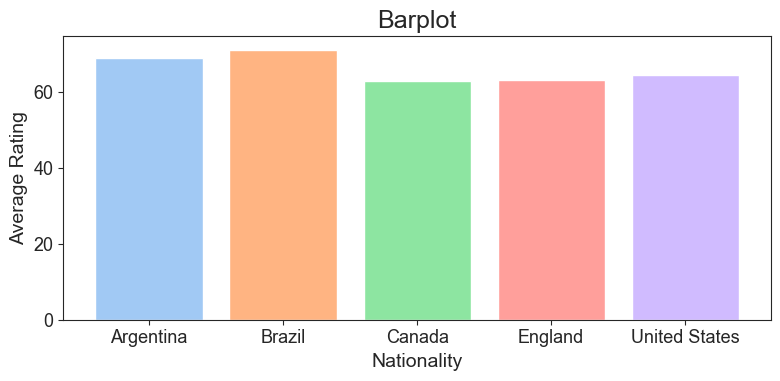

In [4]:
# Preprocessing
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

# matplotlib
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
# deep, pastel, Set2

#plotting
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5], )

plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.savefig('barplot_matplotlib.png')
plt.show()

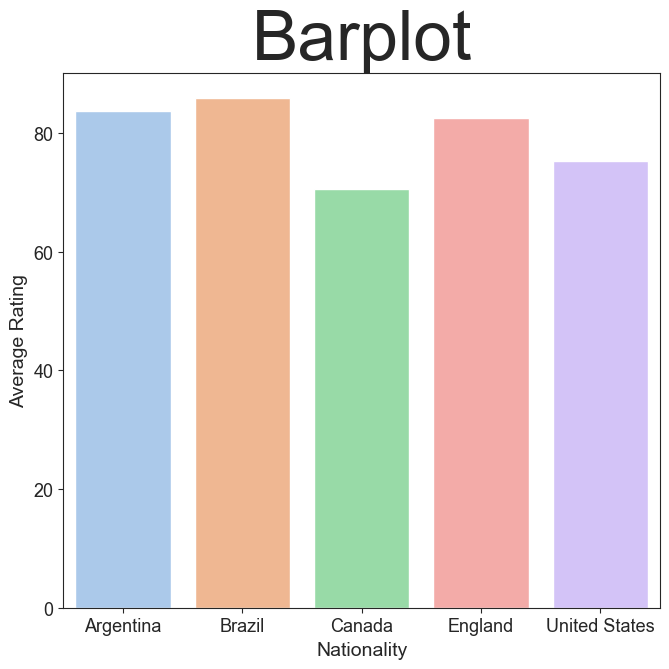

In [11]:
# preprocessing
# To get the top 20 players of each country we need to do some preprocessing
new_df = pd.concat([df_country[df_country['nationality']=='Argentina'][:20], 
                   df_country[df_country['nationality']=='Brazil'][:20], 
                   df_country[df_country['nationality']=='England'][:20], 
                   df_country[df_country['nationality']=='Canada'][:20], 
                   df_country[df_country['nationality']=='United States'][:20]] )

barplot = new_df.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

# seaborn
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['overall'], palette='pastel', ci=None)
ax.set(title='Barplot', xlabel='Nationality', ylabel='Average Rating')
plt.savefig('barplot_seaborn.png')
plt.show()

### Barplot grouped by 3 variables

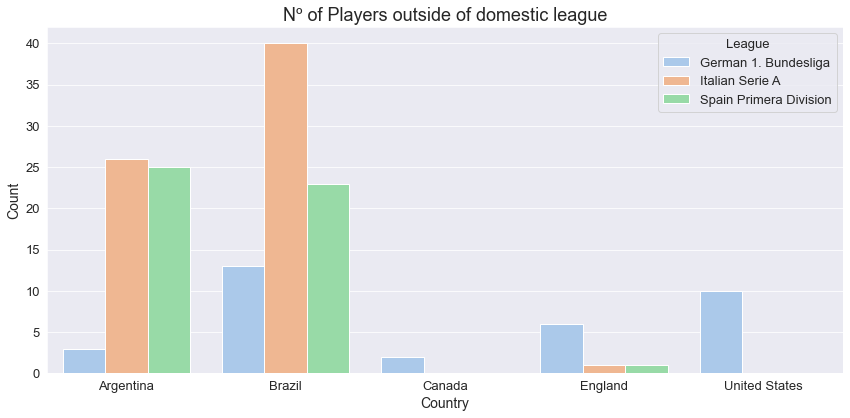

In [13]:
# Preprocessing
barplot = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]
barplot = barplot.groupby(['nationality', 'league_name'], as_index=False).count()

# seaborn
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['sofifa_id'], hue=barplot['league_name'], palette='pastel')
ax.set(title='Nº of Players outside of domestic league' ,xlabel='Country', ylabel='Count')
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.savefig('barplot_grouped_seaborn.png')
plt.show()

# Histogram

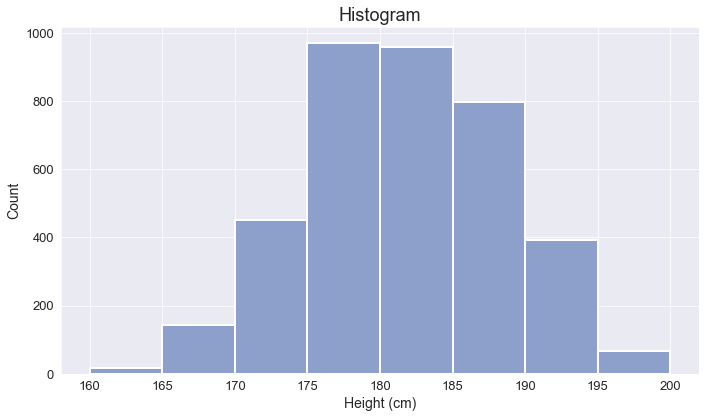

In [15]:
# matplotlib
plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]
plt.hist(df_country['height_cm'], bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)

plt.title('Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.savefig('histogram_matplotlib.png')
plt.show()

# Boxplot

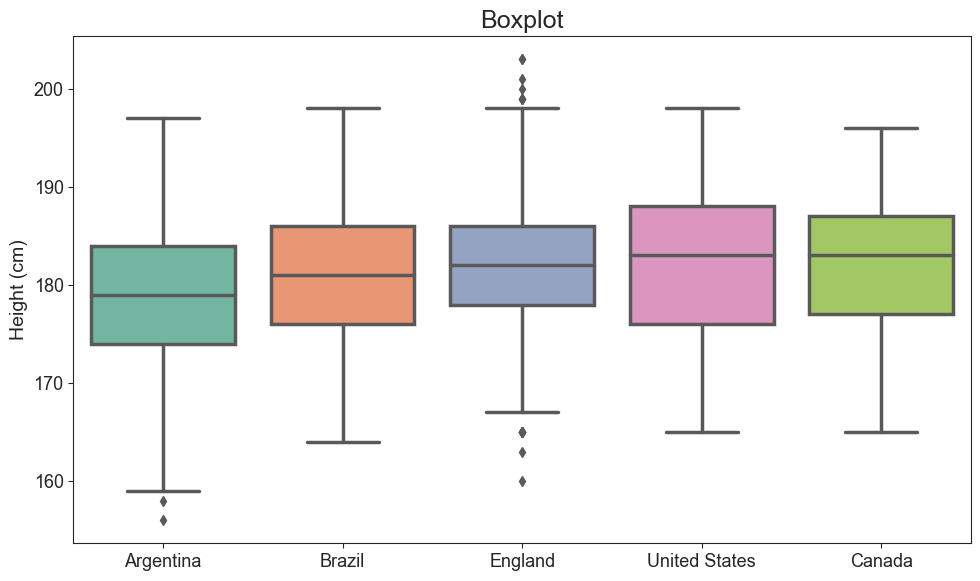

In [8]:
# matplotlib
# plt.boxplot(df_country['height_cm'])

# seaborn
plt.figure(figsize=(10,6), tight_layout=True)

# ax = sns.boxplot(x=df_country['height_cm'], color=sns.color_palette('Set2')[2], linewidth=2.5)
ax = sns.boxplot(data=df_country, x='nationality', y='height_cm', palette='Set2', linewidth=2.5)
ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')

plt.savefig('boxplot.png')
plt.show()

# Scatterplot

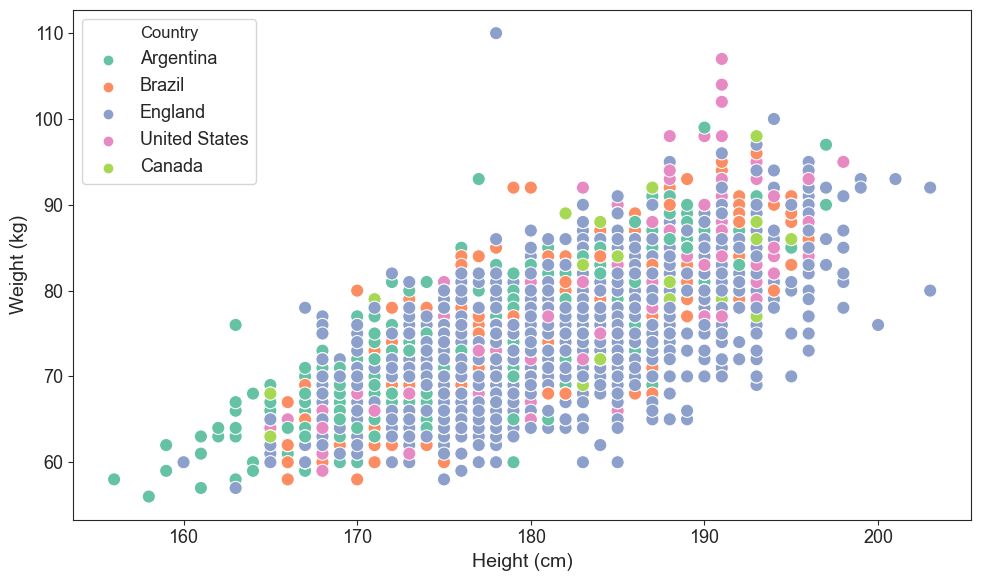

In [11]:
# matplotlib
# plt.scatter(df_country['height_cm'], df_country['weight_kg'])

# seaborn
plt.figure(figsize=(10,6), tight_layout=True)

ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg', hue='nationality',
                     palette='Set2', s=90)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 

plt.savefig('scatterplot.png')
plt.show()

# Single Piechart

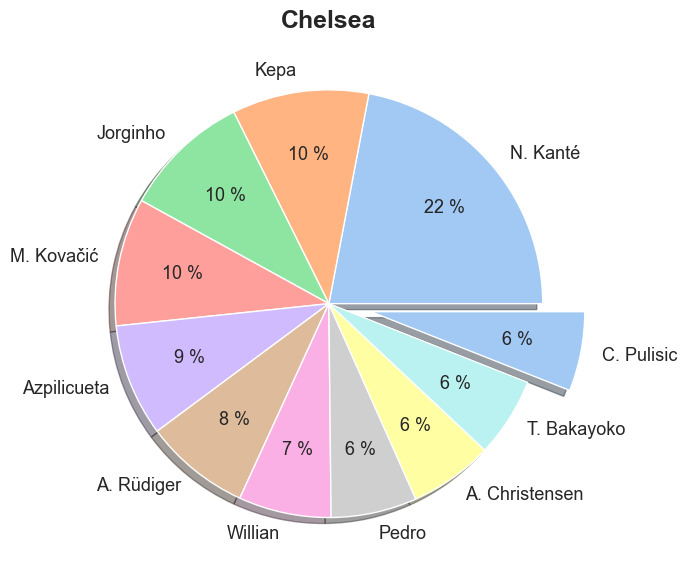

In [8]:
# Preprocessing
piechart = df_fifa21[df_fifa21['club_name']=='Chelsea']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
piechart = piechart[:11]
piechart

# plotting
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Chelsea', weight='bold')
plt.savefig('piechart.png')
plt.show()

# Piechart + Subplots

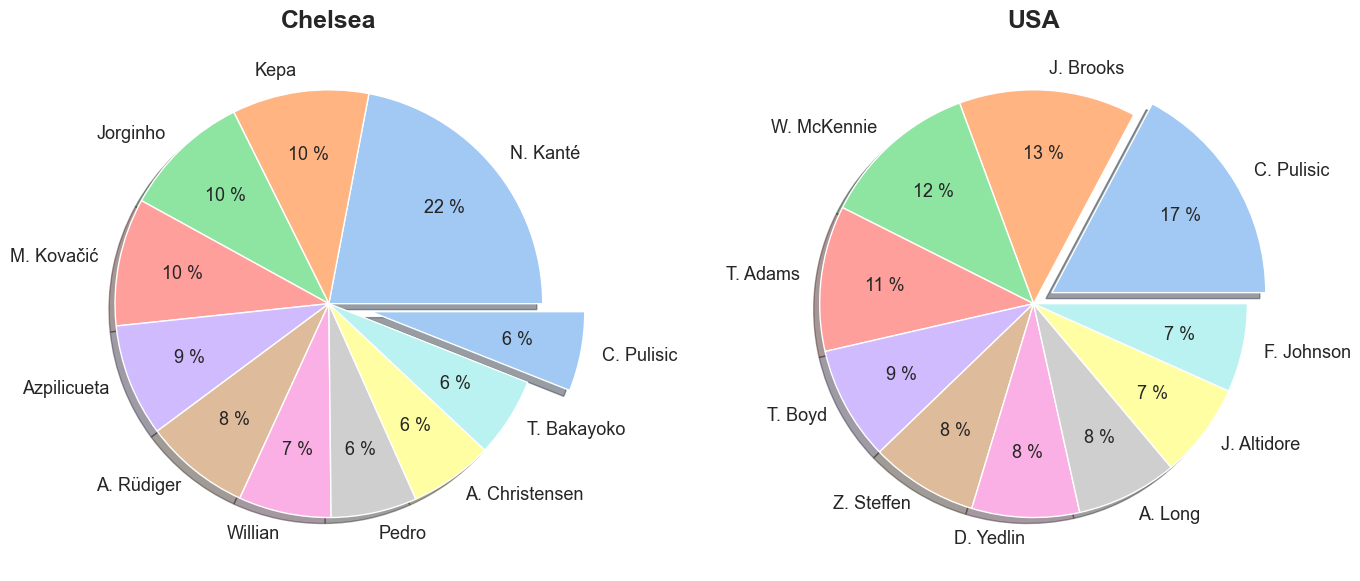

In [28]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(15, 6), tight_layout=True)

# Preprocessing
piechart = df_fifa21[df_fifa21['club_name']=='Chelsea']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']][:11]

piechart2 = df_fifa21[df_fifa21['nationality']=='United States']
piechart2 = piechart2.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']][:10]

# matplotlib
colors = sns.color_palette('pastel')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Chelsea', weight='bold')

explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('USA', weight='bold')

plt.savefig('piechart_subplots.png')
plt.show()

# Line Plot

In [5]:
frames = [df_fifa17, df_fifa18, df_fifa19, df_fifa20, df_fifa21]

for i, frame in enumerate(frames):
    frame['year'] = 2017 + i
    
lineplot = pd.concat(frames)[['short_name', 'overall', 'year']]
list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
lineplot = lineplot[lineplot['short_name'].isin(list_players)]
lineplot = lineplot.pivot(index='short_name', columns='year' ,values='overall').T
lineplot.reset_index(inplace=True)

lineplot

short_name,year,Cristiano Ronaldo,K. De Bruyne,K. Mbappé,L. Messi,V. van Dijk
0,2017,94.0,88.0,NaN,93.0,79.0
1,2018,94.0,89.0,83.0,93.0,83.0
2,2019,94.0,91.0,87.0,94.0,85.0
3,2020,93.0,91.0,89.0,94.0,90.0
4,2021,93.0,91.0,89.0,94.0,90.0


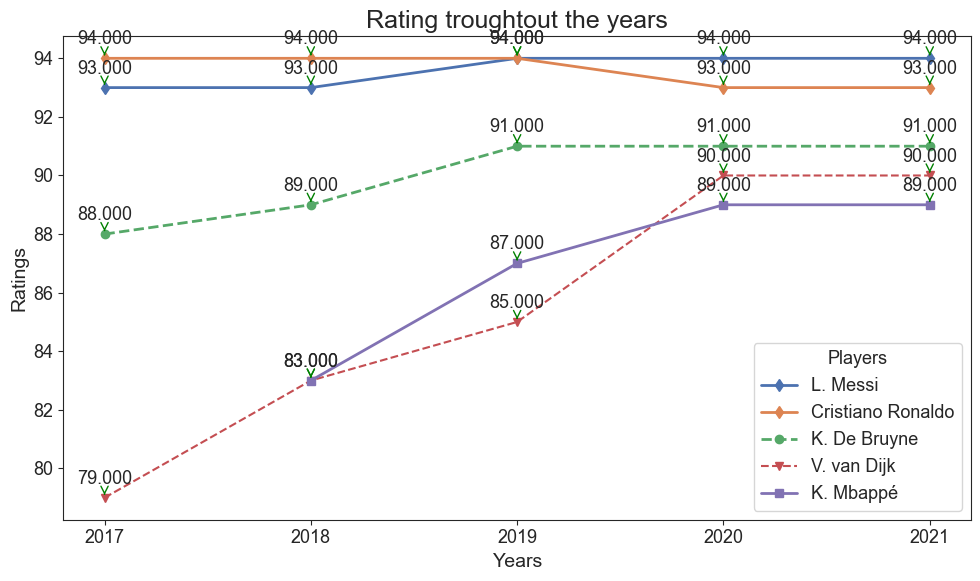

In [11]:
# # matplotlib traditional way
plt.figure(figsize=(10,6), tight_layout=True)
colors = sns.color_palette('deep') 

plt.plot(lineplot['year'], lineplot['L. Messi'], 'd-', linewidth=2, color=colors[0], label='L. Messi')
plt.plot(lineplot['year'], lineplot['Cristiano Ronaldo'], 'd-', linewidth=2, color=colors[1], label='Cristiano Ronaldo')
plt.plot(lineplot['year'], lineplot['K. De Bruyne'], 'o--', linewidth=2, color=colors[2], label='K. De Bruyne')
plt.plot(lineplot['year'], lineplot['V. van Dijk'], 'v--', color=colors[3], label='V. van Dijk')
plt.plot(lineplot['year'], lineplot['K. Mbappé'], 's-', linewidth=2, color=colors[4], label='K. Mbappé')

#joins the x and y values
for x,y in zip(lineplot['year'],lineplot['K. De Bruyne']):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))
                 
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating troughtout the years')
plt.legend(title='Players', title_fontsize = 13)
plt.savefig('lineplot_matplot.png')
plt.show()